#데이터 : 
-공유자전거 수요 예측 (bike sharing demand) </br>
#데이터 선정 이유 : 
-소비자의 수요에 맞춰 자원을 효과적으로 활용할 수 있다 . </br>
-공유자전거가 증가하는 트렌드에 맞춰 대비할 수 있다.

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/MyDrive/bike-sharing-demand-meta/train.csv'
df = pd.read_csv(filename)
print(df.shape)
df.head()

## datetime : 2011-01-01 00:00:00 ~ 2012-12-19 23:00:00
## season : 1~4 => 1: spring, 2: summer, 3:fall, 4: winter
## weather : 1~4 => Clear, Few clouds, Partly cloudy, Partly cloudy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
mask = df['datetime']=='2011-04-19 09:00:00'    ##19일까지밖에없네
df[mask]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1763,2011-04-19 09:00:00,2,0,1,3,21.32,25.0,63,6.0032,23,139,162


In [ ]:
target = 'count'

## 결측치 확인. : (없음.)
[(x, df[x].isnull().sum()) for x in df.columns if df[x].isnull().any()]

# from pandas_profiling import ProfileReport
# # !pip install --upgrade pandas

# # !pip install pandas-profiling[notebook]
# # !pip install -U pandas-profiling      ## update하기.
# report = ProfileReport(df)
# report    ## categorical 한 columns : Type, Method, Regionname, CouncilArea ; (4개)

[]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


145.0


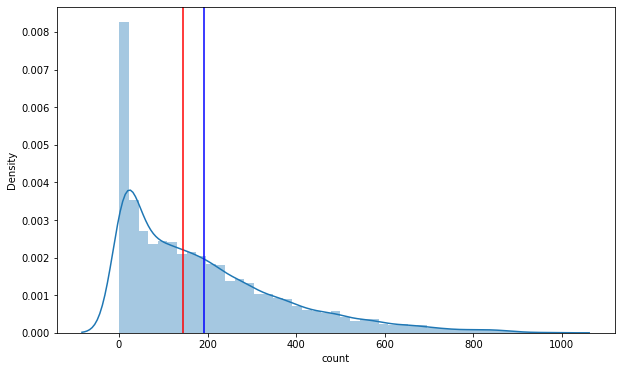

In [ ]:
## target분포 확인
from matplotlib import pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(df[target])
plt.axvline(df[target].median(), color='red');
plt.axvline(df[target].mean(), color='blue')
print(df[target].median())

In [ ]:
# np.percentile 사용해 이상치 제거
df = df[(df[target] >= np.percentile(df[target], 0.05)) & 
        (df[target] <= np.percentile(df[target], 99.5))]

In [ ]:
target_log = np.log1p(df[target])   ## log1p= ln(1 + x)  ;  np.log(df[target]+1)
df['target_log'] = target_log
# df = df.drop(columns=[target], axis=1)
# target = 'target_log'

In [ ]:
# target_log = np.log1p(df[target])   ## log1p= ln(1 + x)  ;  np.log(df[target]+1)

# df['area_log'] = target_log
# sns.histplot(target_log);
# plt.axvline(df['area_log'].median(), color='red');    ## 변환해도 target이 skewed된 분포이기 때문에, 정규분포에 가깝도록 median을 기준라인으로 잡겠습니다.
# plt.axvline(df['area_log'].mean(), color='blue')
# print(df['area_log'].median())

In [ ]:
# target = 'area_log'
# df = df.drop(columns=['area'])    ## target의 최대 최소 분포 차가 너무 커서 log값을 씌워 차이를 완화해줌.

In [ ]:
# ## target과 feature간 상관관계 확인.

# df.corr().iloc[:,-1].sort_values(ascending = False)

# for i in df.columns:
#   f, ax = plt.subplots(figsize=(4,4))
#   plt.xlabel(i)
#   ax.scatter(df[i], df[target])

# for i in df.columns:
#   plt.scatter(df[i], df[target])

In [ ]:
# sns.set(style='whitegrid', context='notebook')
# sns.pairplot(df.columns, height=2)

In [ ]:
## 각 column data 확인.
for i in df.columns:
  print(i, df[i].unique())

datetime ['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']
season [1 2 3 4]
holiday [0 1]
workingday [0 1]
weather [1 2 3 4]
temp [ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
atemp [14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  38.635  1.515  0.76   2.275 43.18  44.695 45.455]
humidity [ 81  80  75  86  76  77  72  82  88  87 

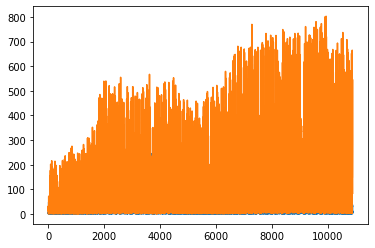

In [ ]:
## casual, registered
fig, ax = plt.subplots()
ax.plot(df['casual'])
ax.plot(df['registered'])

In [ ]:
## 시간에 따라 train, test 나누기 (datetime에 맞춰 sort되어 있음.)

train = df.loc[:len(df)*0.8,:]
test = df.loc[len(df)*0.8:,:]
val = train.loc[len(train)*0.8:,:]
train = train.loc[:len(train)*0.8,:]


print(len(df), len(train), len(val), len(test))
print(train)
print(val)
print(test)

10833 6923 1730 2180
                 datetime  season  holiday  ...  registered  count  target_log
0     2011-01-01 00:00:00       1        0  ...          13     16    2.833213
1     2011-01-01 01:00:00       1        0  ...          32     40    3.713572
2     2011-01-01 02:00:00       1        0  ...          27     32    3.496508
3     2011-01-01 03:00:00       1        0  ...          10     13    2.639057
4     2011-01-01 04:00:00       1        0  ...           1      1    0.693147
...                   ...     ...      ...  ...         ...    ...         ...
6918  2012-04-06 14:00:00       2        0  ...         250    490    6.196444
6919  2012-04-06 15:00:00       2        0  ...         319    537    6.287859
6920  2012-04-06 16:00:00       2        0  ...         352    536    6.285998
6921  2012-04-06 17:00:00       2        0  ...         483    655    6.486161
6922  2012-04-06 18:00:00       2        0  ...         380    484    6.184149

[6923 rows x 13 columns]
     

In [ ]:
# 특성공학


def engine(df):
  df = df.copy()
  

  df['date'] = df['datetime'].apply(lambda x: x.split(' ')[0])
  df['date'] = df['date'].apply(lambda x: x.replace('-',''))
  df['date'] = df['date'].astype(int)     ## 20110101
  # df['date'].     ## 20110101 =>1, ... 20121231 =>마지막.

  df['hour'] = df['datetime'].apply(lambda x: x.split(' ')[1])    ## 시간
  df['hour'] = df['hour'].apply(lambda x: x.split(':')[0])    ## 분단위 삭제.
  df['hour'] = df['hour'].astype(int)

  df['temp_weighted'] = df['temp']*0.4 + df['atemp']*0.6      ## 다중공선성 방지. (체감온도에 조금더 무게를 둬서 두값을 평균냄.)

  df = df.drop(columns=['casual','registered', 'datetime', 'temp', 'atemp'], axis=1)   ## multicolinearity 방지
  return df

train = engine(train)
val = engine(val)
test = engine(test)

y_train_log = train['target_log']
y_val_log = val['target_log']
y_test_log = test['target_log']

train = train.drop(columns=['target_log'], axis=1)
val = val.drop(columns=['target_log'], axis=1)
test = test.drop(columns=['target_log'], axis=1)

y_test_log

8667     5.826000
8668     5.846439
8669     5.805135
8670     5.942799
8671     6.200509
           ...   
10881    5.820083
10882    5.488938
10883    5.129899
10884    4.867534
10885    4.488636
Name: target_log, Length: 2180, dtype: float64

In [ ]:
# ## pair plot (시간오래걸림)

# sns.set(style='whitegrid', context='notebook')
# cols = train.columns   ## 혹은 보고싶은 column만 ['~', '~']
# sns.pairplot(train[cols], height=2);

In [ ]:
## X, y split

feature = train.drop(columns=[target]).columns

X_train = train[feature]
y_train = train[target]
X_val = val[feature]
y_val = val[target]
X_test = test[feature]
y_test = test[target]

print(len(df), len(X_train), len(X_val), len(X_test))

10833 6923 1730 2180


In [ ]:
## modeling

# !pip install category_encoders
from category_encoders import OrdinalEncoder
from sklearn.model_selection import cross_val_score
# from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

pipe = make_pipeline(
    OrdinalEncoder(),
    # SimpleImputer(strategy='mean'), 
    # StandardScaler(),
    # SelectKBest(f_regression, k=20),
    RandomForestRegressor(max_depth=10)
    # DecisionTreeRegressor()
    # LogisticRegression()
)

# k = 3
# scores = cross_val_score(pipe, X_train, y_train, cv=k, scoring='neg_mean_absolute_error')
# print(f'MAE ({k} folds):', -scores)

pipe.fit(X_train, y_train_log)
print('검증 정확도: ', pipe.score(X_val, y_val_log))

y_test_log_pred = pipe.predict(X_test)
y_omega = np.expm1(y_test_log_pred)
print(mean_absolute_error(y_test, y_omega))
print(mean_squared_log_error(y_test, y_omega))


ModuleNotFoundError: ignored

In [ ]:
## r2 score말고도 explained_variance_score가 있다.

# from sklearn.metrics import explained_variance_score
# yy=pipe.predict(X_train)
# score = explained_variance_score(y_train, yy)

In [ ]:
# depth = range(1, 30, 2)

# ts, vs = validation_curve(
#     pipe, X_train, y_train
#     , param_name='decisiontreeregressor__max_depth'
#     , param_range=depth, scoring='neg_mean_absolute_error'
#     , cv=3
#     , n_jobs=-1
# )

# train_scores_mean = np.mean(-ts, axis=1)
# validation_scores_mean = np.mean(-vs, axis=1)

# fig, ax = plt.subplots()

# # 훈련세트 검증곡선
# ax.plot(depth, train_scores_mean, label='training error')

# # 검증세트 검증곡선
# ax.plot(depth, validation_scores_mean, label='validation error')

# # 이상적인 max_depth
# ax.vlines(5,0, train_scores_mean.max(), color='blue')

# # 그래프 셋팅
# ax.set(title='Validation Curve'
#       , xlabel='Model Complexity(max_depth)', ylabel='MAE')
# ax.legend()
# fig.dpi = 100

In [ ]:
pipe.named_steps

In [ ]:
y_test_base = np.empty(len(y_test))
y_test_base.fill(y_test.median())   ## 회귀
# y_test_base.fill(int(test[target].mode()))        ##분류

y_test_base = pd.DataFrame(y_test_base, columns=[target])
print(y_test.median())
print(len(y_test), len(y_test_base))
print(pipe.score(X_test, y_test_base))
print(mean_absolute_error(y_test, y_test_base))     ## y_test.median 이 기준모델이면 163.45 MSE 차이남.
print(pipe.score(X_test,y_test))


y_test_pred = pipe.predict(X_test)
print(mean_absolute_error(y_test, y_test_pred))     ## 모델은 67.86 MSE 차이.  logarithmic 해도 68.766인데...

y_test_base

In [ ]:
i='windspeed'
# f, ax = plt.subplots(figsize=(2,2))
plt.xlabel(i)
plt.scatter(train[i], train[target], color='b')
plt.scatter(test[i], test[target], color='r')